<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#from sklearn.tree import export_graphviz
#import graphviz

In [7]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [8]:

'''
Remover a coluna desnecessária
'''

base = base.drop(columns = ['Unnamed: 0'])

base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [9]:
y = base.iloc[:, 7] #variáveis dependentes, todos os items menos a coluna 7

columns = list(range(0, 27))

columns.remove(7)

X = base.iloc[:, columns].values # variáveis explanatórias

X.shape

(20000, 26)

In [10]:

labelEncoder = LabelEncoder()

for i in range(X.shape[1]):
  if X[:, i].dtype == 'object':
    X[:, i] = labelEncoder.fit_transform(X[:, i])

In [11]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [28]:
model = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=20, max_leaf_nodes=20)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=20, n_estimators=500,
                       random_state=1)

In [29]:
#impressão

predictions = model.predict(X_test)

In [30]:

accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted') # Com peso

recall = recall_score(y_test, predictions, average='weighted')

f1 = f1_score(y_test, predictions, average='weighted')

print(f'Acurácia: {accuracy}, precisão: {precision}, recall: {recall}, F1: {f1}')

Acurácia: 0.9356666666666666, precisão: 0.9326462348629906, recall: 0.9356666666666666, F1: 0.932204759946035


In [31]:
import pickle

import random
num = random.random()
# save the model to disk
filename = f'finalized_{num}_{accuracy}_model.sav'

pickle.dump(model, open(filename, 'wb'))

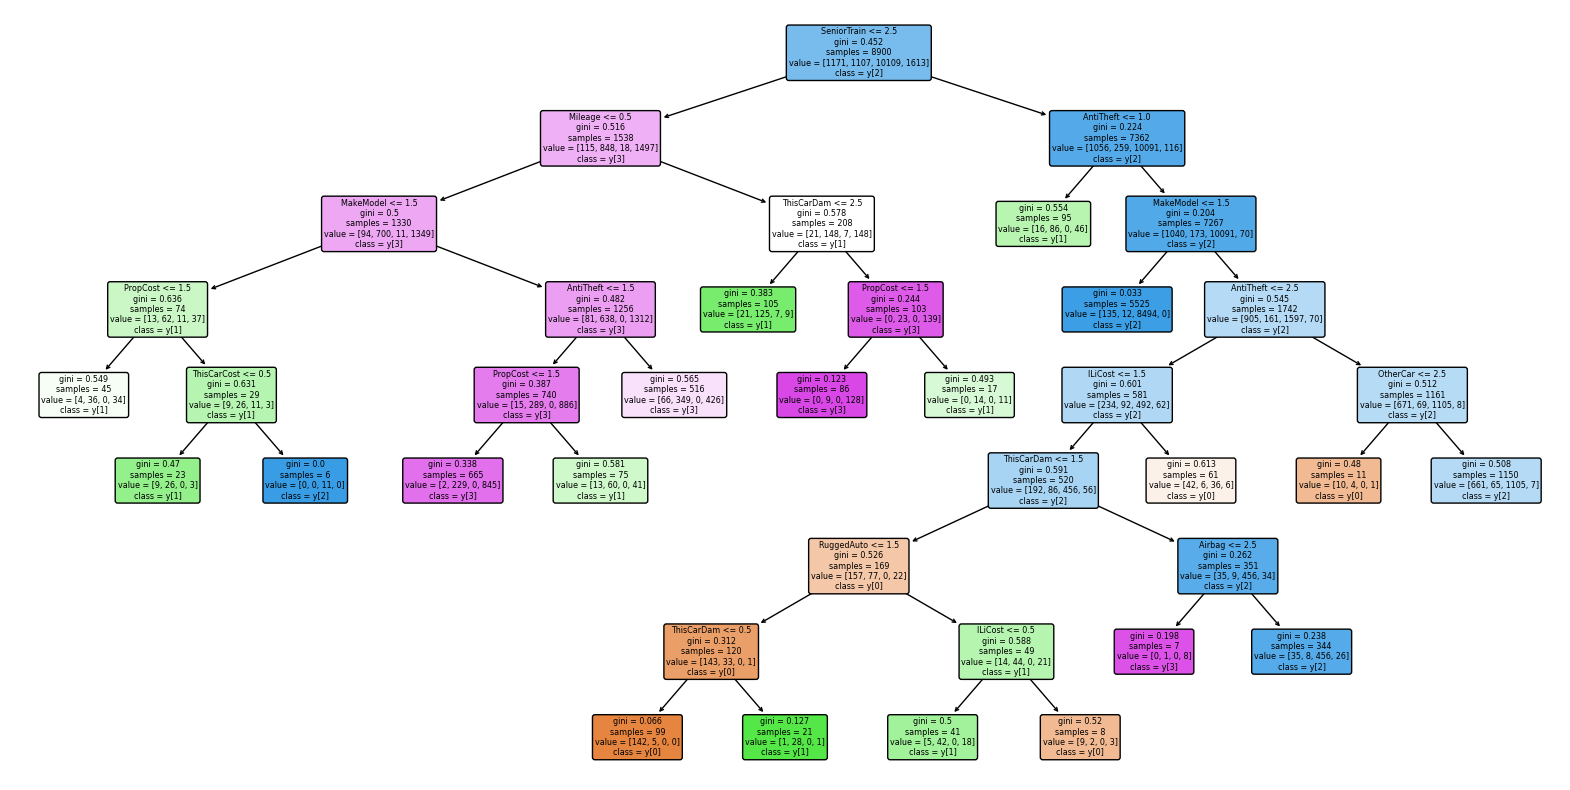

In [32]:
tree_index = 0

tree_to_visualize = model.estimators_[tree_index]
plt.figure(figsize=(20, 10))

plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

plt.show()